In [1]:
import numpy as np
import pandas as pd

In [2]:
#Read text file and convert to csv
text_file = pd.read_csv("./data/data_banknote_authentication.txt") 
  
#storing this dataframe in a csv file 
text_file.to_csv('./data/data_banknote_authentication.csv',  index = None) 

#read the csv file
banknote_dataset = pd.read_csv("./data/data_banknote_authentication.csv", header = None)

#add the columns
banknote_dataset.columns = ["Variance","Skewness","Kurtosis","Entropy","Class"]

#print the data with added headers
banknote_dataset.head()

Variance  Skewness  Kurtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

In [3]:
#Consider all columns as independent variables and assign to variable X except the last column 
#and consider the last column as the dependent variable and assign to variable y. 

X = banknote_dataset.iloc[:,:-1].values
Y = banknote_dataset.iloc[:, -1].values

print(X)
print()
print(Y)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]

[0 0 0 ... 1 1 1]


In [4]:
#Compute some basic statistical details like percentile, mean, standard deviation of dataset 
banknote_dataset.describe()

Variance     Skewness     Kurtosis      Entropy        Class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000

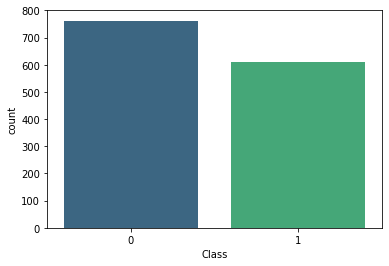

In [5]:
import seaborn as sb
sb.countplot(x = 'Class', data = banknote_dataset, palette = 'viridis')

In [6]:
# scaling the dataset
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
X = scaller.fit_transform(banknote_dataset)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#Split the data into train and test dataset (1 point)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (1097, 5)
X_test shape: (275, 5)
y_train shape: (1097,)
y_test shape: (275,)


In [9]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
## Prediction
y_pred=classifier.predict(X_test)
### Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print('Accuracy:',  score)

Accuracy: 1.0


In [11]:
from sklearn.metrics import confusion_matrix

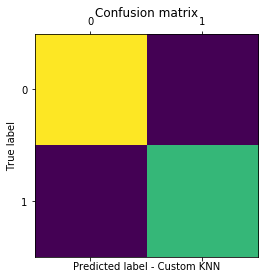

[[165   0]
 [  0 110]]


In [12]:
import matplotlib.pyplot as plt
random_forest_confusion_matrix  = confusion_matrix(y_test, y_pred)

plt.matshow(random_forest_confusion_matrix)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label - Custom KNN')
plt.show()
print(random_forest_confusion_matrix)